One-dimensional quantum walk in julia.

In [30]:
M = 100000;
V = zeros(ComplexF64, 4M+2);
V[2M+1] = 1/sqrt(2);
V[2M+2] = 1im/sqrt(2);

In [31]:
function one_step(V::Vector{<:ComplexF64})
    M = round(Int, (length(V)-2)/4);
    V_H = zeros(ComplexF64, 4M+2);
    V_UH = zeros(ComplexF64, 4M+2);

    for i in 1:2:4M+1
        V_H[i] = (V[i] + V[i+1])/sqrt(2);
    end
    for i in 2:2:4M+1
        V_H[i] = (V[i] - V[i-1])/sqrt(2);
    end

    for i in 1:2:4M-1
        V_UH[i+2] = V_H[i]
    end
    for i in 4:2:4M+2
        V_UH[i-2] = V_H[i]
    end

    return V_UH;
end;

In [32]:
for i in 1:10000
    V = one_step(V);
end

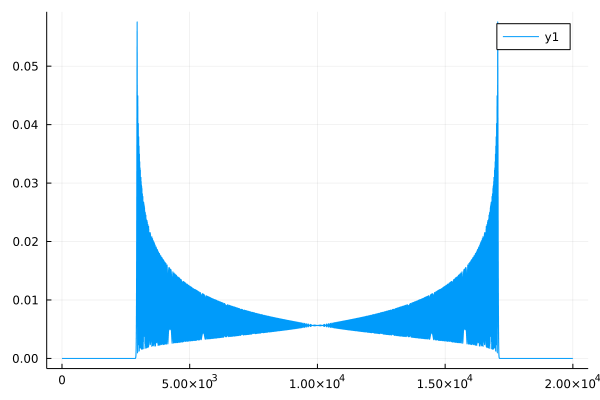

In [33]:
using Plots;
plot(broadcast(abs,V[V.!=0]))